## Simple SDE

$$
dx = f(t, x) dt + \sigma(t, x) dW
$$

$$
t \in [0, 1], \quad x \in [-3, 3]^2 \in R^2
$$

$$
x_0 = ?
$$

$$
f(t, x) = A x,
\quad
A = \begin{bmatrix}
1 & 0 \\
1 & 1
\end{bmatrix}
$$

$$
\sigma(t, x) = B,
\quad
B = \begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}
$$

In [1]:
from IPython.display import HTML
import matplotlib.pyplot as plt
import numpy as np
import sys

sys.path.append('./../lib')

from equation import Equation
from solver import Solver

In [2]:
d = 2 # dimension of spatial variable
q = 2 # dimension of noise
m = 1 # number of samples

A = np.array([
    [1.0, 0.0],
    [1.0, 1.0],
])

def s(t, x): return np.eye(d, q)
def f(t, x): return A@x
def fx(t, x): return A
def x0(t, x): return np.array([1.0, 2.0])
def r0(t, x): return np.exp(-0.5 * np.diag(x.T@x))

In [3]:
EQ = Equation(d, q, m)
EQ.init_t_lim(t_min=+0., t_max=+1., t_poi=10)
EQ.init_x_lim(x_min=-3., x_max=+3., x_poi=10)
EQ.init_funcs(s, f, fx, x0, r0, xr=None)
EQ.prep()

In [4]:
SL = Solver(EQ)
SL.solve()

Total time    : 0.0029   sec
Time per step : 0.0003   sec


r min  : t=min 0.0001   | t=max 0.0000  
r max  : t=min 0.8948   | t=max 0.0932  
r mean : t=min 0.1412   | t=max 0.0147  


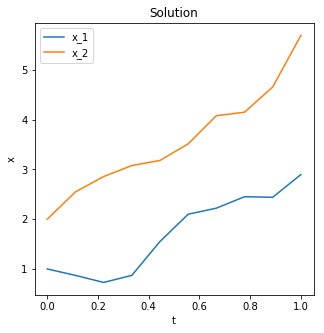

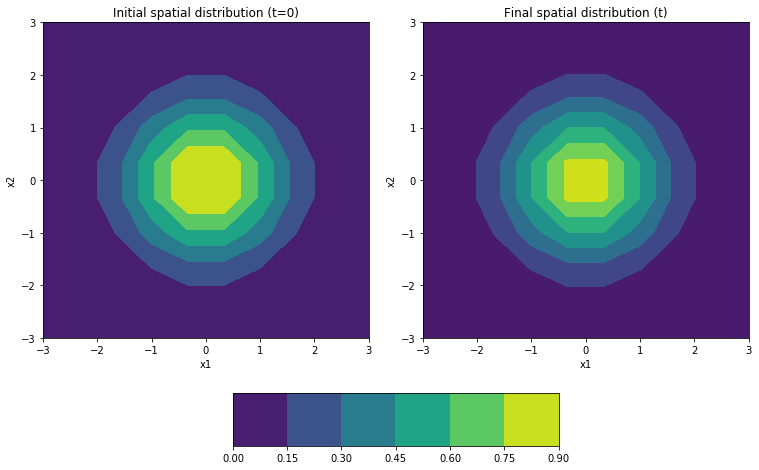

In [5]:
EQ.pres()
EQ.plot_x()
EQ.plot_r()

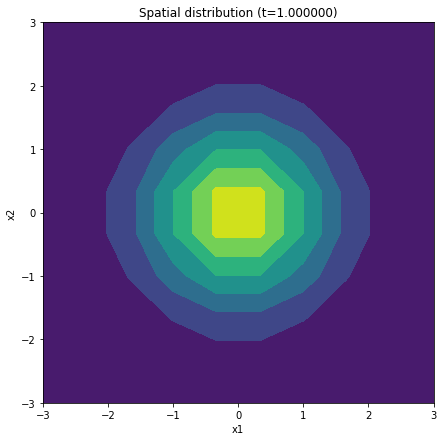

In [6]:
HTML(EQ.anim_r(fffolder='./../tmp', delt=200))